## 1. Import packages

In [2]:
import graphviz 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
!pip install graphviz

In [14]:
 conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\shrad\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py37haa95532_0         2.9 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    python-graphviz-0.16       |     pyhd3eb1b0_1          20 KB
    ------------------------------------------------------------
                                           Total:        32.2 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/noarch::python-graphviz-0.16-pyhd3eb1b0_1

The following packages will be UPDATED:

  conda                                        4.8.3-py37_0 --> 4.9.2-py37haa95532_0




python-graphviz-0.16 | 20 KB     |            |   0% 
p

## 2. Load and format data

In [3]:
# Load data

df = pd.read_csv('loans.csv')

df.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


We are going to build regressors to predict the loan amount.

Here we choose a limited subset of data to conduct the analysis for the sake of training time. 

In [4]:
# Drop everything that is not numeric
df = df.select_dtypes(exclude=['object'])

In [55]:
df.head()
df.columns

Index(['id_number', 'loan_amount', 'lender_count', 'funded_amount',
       'repayment_term'],
      dtype='object')

#Question 1 (1 points):#

Set the y_column to be the loan_amount. This is what we are trying to predict.


Create another dataframe (X), which contains the remaining columns our original dataframe EXCEPT 'loan_amount" and 'id_number' (id_number will not be useful here). 


Your X dataframe should look like the output shown below.

*Hint* -- you will find df.drop function useful here.



In [16]:
#X=df.iloc[:,[2,4]].values
#y=df.iloc[:,1].values
#YOUR CODE GOES HERE



In [5]:
X = df.drop(['id_number','loan_amount'], axis=1)
y=df.drop(['id_number', 'lender_count', 'funded_amount','repayment_term'],axis=1)

In [46]:
X.head()
y.head()

,loan_amount
0,4825
1,975
2,950
3,825
4,725


In [33]:
#y=df.iloc[:,1].values

In [7]:
y.values

array([[4825],
       [ 975],
       [ 950],
       ...,
       [ 200],
       [ 200],
       [ 200]], dtype=int64)

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Build a Decision Tree

We will use sklearn's implementation of a Decision Tree Regressor and to learn how to use it, here are the [docs](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.get_params), or simply put a question mark before a call to the class.  

Prepending a ? to any method, variable, or class will display that method's defined docstring (way to go IPython!)

In [ ]:
# DecisionTreeRegressor?

Many of the sklearn algorithms are implemented using the same standard steps: 
- **Step 1: Initiate the algorithm** Define the parameters (& hyperparameters of the algorithm) of the algorithm. For example, the maximum depth, the minimum samples in a leaf etc. (check documentation for more information)

- **Step 2: Train the algorithm** Train the algorithm by fitting it to the X_train and y_train datasets.

- **Step 3: Evaluating the algorithm** Evaluate the predictive power of the algorithm by comparing the predictive loan amount values to the true values. We can do this for the training and testing dataset.

Here is a function which encapsulates the 3 model implementation steps; Initialize, Train, Evaluate our decision tree regressor. 

In [7]:
def train_score_regressor(sklearn_regressor, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
    """A helper function that:
        - Trains a regressor on training data
        - Scores data on training and test data
        - Returns a trained model
    """
    # Step 1: Initializing the sklearn regressor 
    regressor = sklearn_regressor(**model_parameters)
    
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
    regressor.fit(X_train, y_train)
    
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    training_score = regressor.score(X_train, y_train)
    testing_score = regressor.score(X_test, y_test)
    
    # Print the results!
    print(f"Train score: {training_score:>5.4f}")
    print(f"Test score: {testing_score:>7.4f}")
    if print_oob_score:
        print(f"OOB score: {regressor.oob_score_:>8.4f}")
        
    return regressor

With all tree algorithms the major challenge is using the parameters to balance the bias vs variance trade-off.  

To start, check how the model preforms when using the default values.

In [8]:
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters={'random_state':42})

Train score: 0.9830
Test score:  0.8886


Our model managed to get a perfect r2 scored on the training data but performs poorly on the test data.  This is a clear indication that the model has **overfit to the training data**.

The default sklearn's implementation of a DecisionTreeRegressor does not put any restrictions on the depth of the tree, the number of samples per leaf, etc.  Consequently, the model finds signal in the noise of the training data set, overfits and performs poorly on the test data.  

When a model overfits to a training data set, we say it has **high variance**.  Since an unconstrained decision tree will almost perfectly model any training data, it will vary tremendously depending on the training data that is provided.

## 4. Parameter tuning

To reduce the variance, we constrain the model using some of the provided parameters for example:
- Maximum depth of the tree
- Minimum samples for each terminal node


Initially, we are going to experiment with the max_depth parameter only. 

In [9]:
# Define the model parameters 
# We are fixing the random state so that the results are reproducible and consistent.
parameters = {"max_depth":6,
              'random_state':42}

# Train and evaluate the model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters)

Train score: 0.9319
Test score:  0.9390


Although the training r2 score has dropped significantly, the test r2 score increased. Since the goal is develop a model that accurately predict data we have never seen, that is the metric we care about!

Now that we have increased preformance, let's take a look at what the Decision Tree looks like.

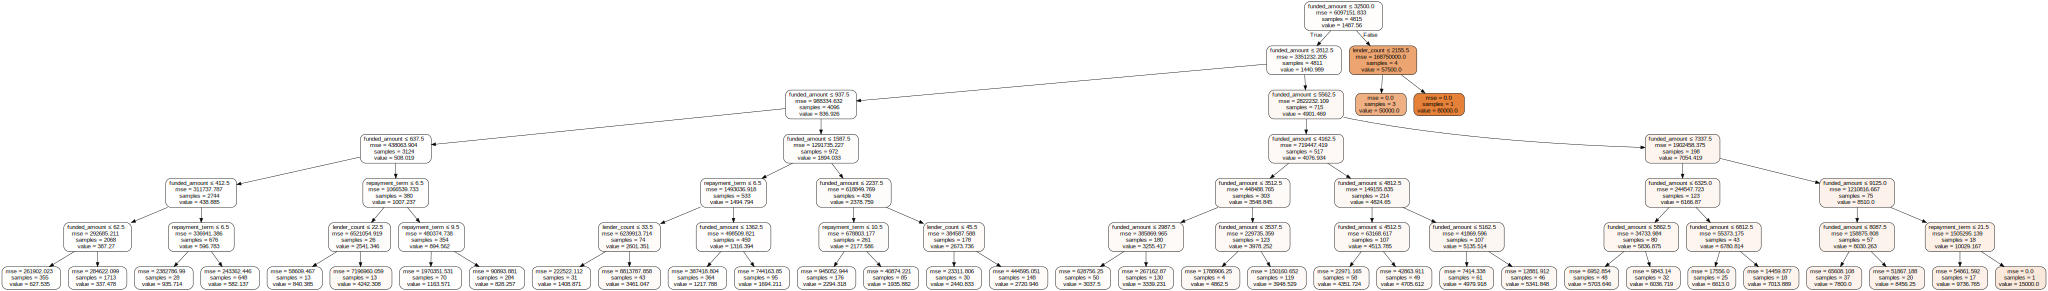

In [10]:
# from the sklearn tree library, create image of trained decision tree
dot_data = tree.export_graphviz(trained_regressor, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=y_train.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
# Use graphviz to render the image
# You may to need to install graphviz, see directions at the end of notebook
graph = graphviz.Source(dot_data)  
graph

#Question 2 (3 points): #

A DecisionTreeRegressor with a max depth of only 6 is still rather complicated. 



To develop your intuition for the various input parameters, manually adjust them up and down to see the impacts.

Overall we're aiming for the highest predictive power on the test set.


Test at least 3 max depth parameters (other than 6). You should show the train and test score for each of your options. 


Note that in practice, if you were to tune the parameters manually towards a higher score on the test data set, we would overfit to this specific test data set and the model would not generalize well to a secondary test data set.  


In [11]:

#your code goes here.
#hyperparameter option 1
parameters = {"max_depth":7,
              'random_state':42}

# Train and evaluate the model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters)



Train score: 0.9388
Test score:  0.7267


In [15]:

#your code goes here.
#hyperparameter option 2

parameters = {"max_depth":11,
              'random_state':42}

# Train and evaluate the model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters)


Train score: 0.9695
Test score:  0.6967


In [14]:
#your code goes her
#hyperparameter option 3
parameters = {"max_depth":10,
              'random_state':42}

# Train and evaluate the model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters)

Train score: 0.9623
Test score:  0.7135


#Question 3 (3 points): #

Test three values for the hyperparameter (Minimum samples for each terminal node) and note the score for each. 

You should show the train and test score for each of your options. 

In [16]:


#your code goes here
#hyperparameter option 1
parameters = {"max_depth":2,
              'random_state':42}

# Train and evaluate the model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters)

Train score: 0.7934
Test score:  0.8168


In [17]:
#your code goes here
#hyperparameter option 2
parameters = {"max_depth":3,
              'random_state':42}

# Train and evaluate the model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters)

Train score: 0.8851
Test score:  0.8989


In [18]:
#your code goes here
#hyperparameter option 3
parameters = {"max_depth":4,
              'random_state':42}

# Train and evaluate the model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters)


Train score: 0.9109
Test score:  0.9214


#Question 4 (3 points): #


What did you observe from the various outputs using different hyperparameters? What was your intuition behind choosing these values? 

Write your answers in your OWN ORIGINAL WORDS (at least 50 words expected). 






#YOUR ANSWER GOES HERE

We see that as we increase the maxdepth, overfitting is more prominent. Model is not able to generalize, accuracy in the training set is really good but then in test set it decreased more than 20%. On the other hand, in case of hyperparameters less than 6, accuracy in both the training and test set is almost same. As we compare all the different hyperparameter, 6 seems to do best job.